<a href="https://colab.research.google.com/github/mskmei/MIDTERM-PROJECT-CV-2022Spring/blob/main/YOLOv3/yolov3_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

本文件用于批量测试训练的结果，权重使用了我们训练过程得到最好的权重。我们将使用colab独有的命令“gdown”命令从我的谷歌云端硬盘上下载权重。因此此测试文件只能在colab上运行。

如果想在自己的电脑上进行批量测试，请将权重文件下载到自己的电脑上，放在某一文件目录下，并修改“--wieghts”对应的路径。

权重的下载链接：https://drive.google.com/file/d/1Pglfi0Y8poLzsEPrNgKb0GYXpVjwKtn1/view?usp=sharing

In [ ]:
!git clone https://github.com/mskmei/yolov3.git
%cd yolov3
%pip install -qr requirements.txt

import torch
from yolov3 import utils
display = utils.notebook_init()

YOLOv3 🚀 v9.6.0-47-gee08f9d torch 1.11.0+cu113 CUDA:0 (Tesla K80, 11441MiB)


Setup complete ✅


以下的这步命令只能在colab执行，在自己电脑上请提前下载权重并修改weights路径。

In [ ]:
%cd /content/yolov3
!gdown --id '1Pglfi0Y8poLzsEPrNgKb0GYXpVjwKtn1' --output best.pt

/content/yolov3
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1Pglfi0Y8poLzsEPrNgKb0GYXpVjwKtn1
To: /content/yolov3/best.pt
100% 124M/124M [00:02<00:00, 52.1MB/s]


这一步是测试操作，使用voc_2012test.yaml为我们提供训练的信息（比如数据集下载路径）。测试使用**voc2012的测试集**数据进行测试，测试结果如下。

In [ ]:
!python val.py --weights /content/yolov3/best.pt --data voc_2012test.yaml --img 416 --iou 0.5

val: data=/content/yolov3/data/voc_2012test.yaml, weights=['/content/yolov3/best.pt'], batch_size=32, imgsz=416, conf_thres=0.001, iou_thres=0.5, task=val, device=, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv3 🚀 v9.6.0-47-gee08f9d torch 1.11.0+cu113 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 261 layers, 61599745 parameters, 0 gradients

100% 1.82G/1.82G [01:49<00:00, 17.8MB/s]
Unzipping ../datasets/VOC_2012/images/VOCtrainval_11-May-2012.zip...
train2012: 100% 5717/5717 [00:02<00:00, 2513.07it/s]
val2012: 100% 5823/5823 [00:02<00:00, 2555.10it/s]
Dataset autodownload success, saved to ../datasets

val: Scanning '../datasets/VOC_2012/labels/val2012' images and labels...5823 found, 0 missing, 0 empty, 0 corrupted: 100% 5823/5823 [00:02<00:00, 1970.62it/s]
val: New cache created: ../datasets/VOC_2012/labels/val2012.cache
     

以下操作与上一个文件重复，但是可以直观展示测试的结果。

In [ ]:
!python detect.py --weights /content/yolov3/best.pt --img 416 --conf 0.25 --source data/images

detect: weights=['/content/yolov3/best.pt'], source=data/images, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv3 🚀 v9.6.0-47-gee08f9d torch 1.11.0+cu113 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 261 layers, 61599745 parameters, 0 gradients
image 1/5 /content/yolov3/data/images/bus.jpg: 416x320 1 bus, 3 persons, Done. (0.064s)
image 2/5 /content/yolov3/data/images/cat.jpg: 320x416 2 cats, Done. (0.055s)
image 3/5 /content/yolov3/data/images/person.jpg: 288x416 2 persons, Done. (0.061s)
image 4/5 /content/yolov3/data/images/plane.jpg: 288x416 1 aeroplane, 1 boat, Done. (0.058s)
image 5/5 /content/yolov3/data/images/zidane.jpg: 256x416 2 persons, Done. (0.06

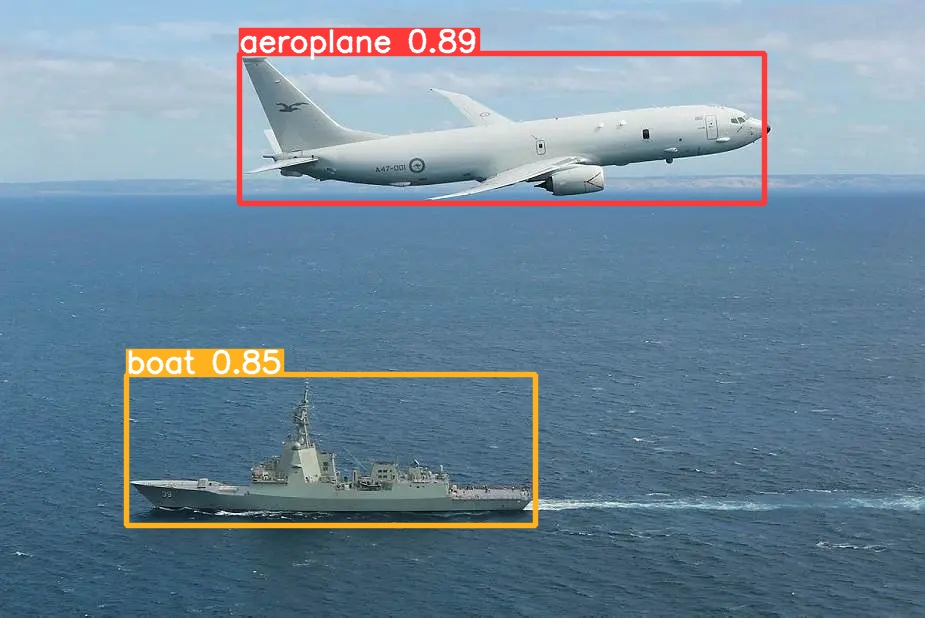

In [ ]:
display.Image(filename='runs/detect/exp/plane.jpg', width=400)

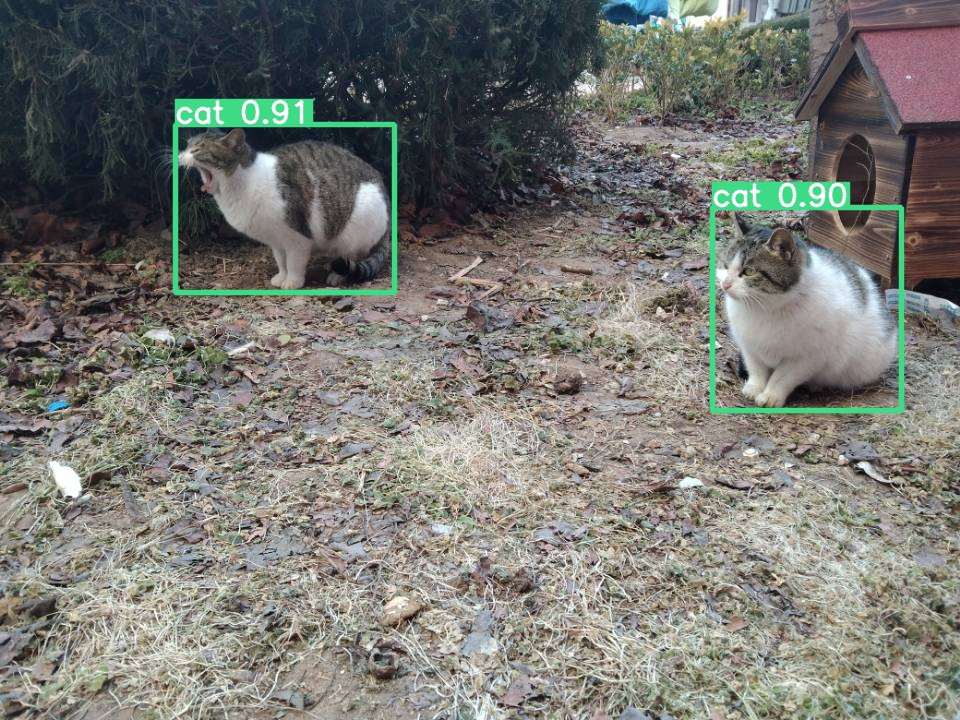

In [ ]:
display.Image(filename='runs/detect/exp/cat.jpg', width=400)

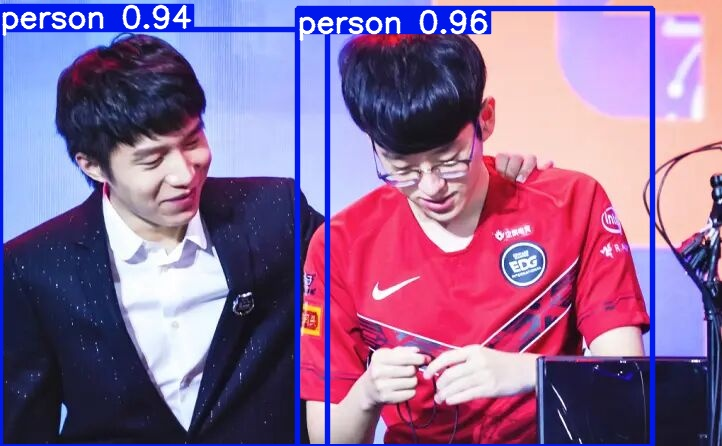

In [ ]:
display.Image(filename='runs/detect/exp/person.jpg', width=400)